# Question 1. Load the Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [2]:
tf.keras.datasets.cifar100.load_data(
    label_mode='coarse'
)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [4]:
unique = np.unique(y_train)
num_unique_labels = len(unique)
num_unique_labels

20

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

In [5]:
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(labels[i][0])
    plt.suptitle(title)
    plt.show()



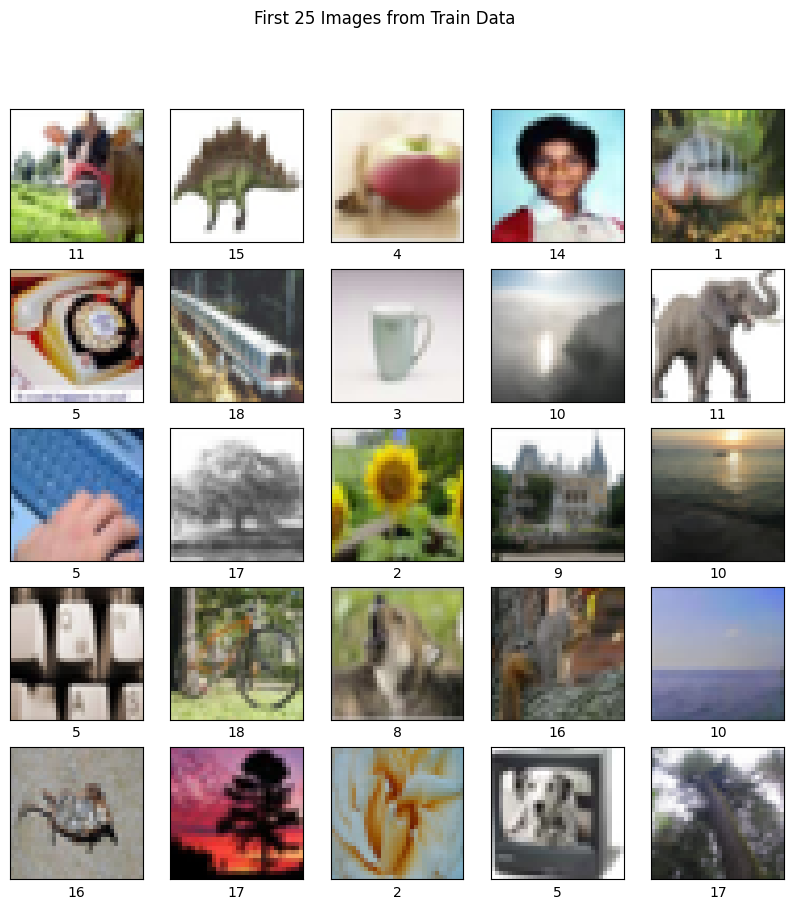

In [6]:
 plot_images(x_train,y_train, "First 25 Images from Train Data")



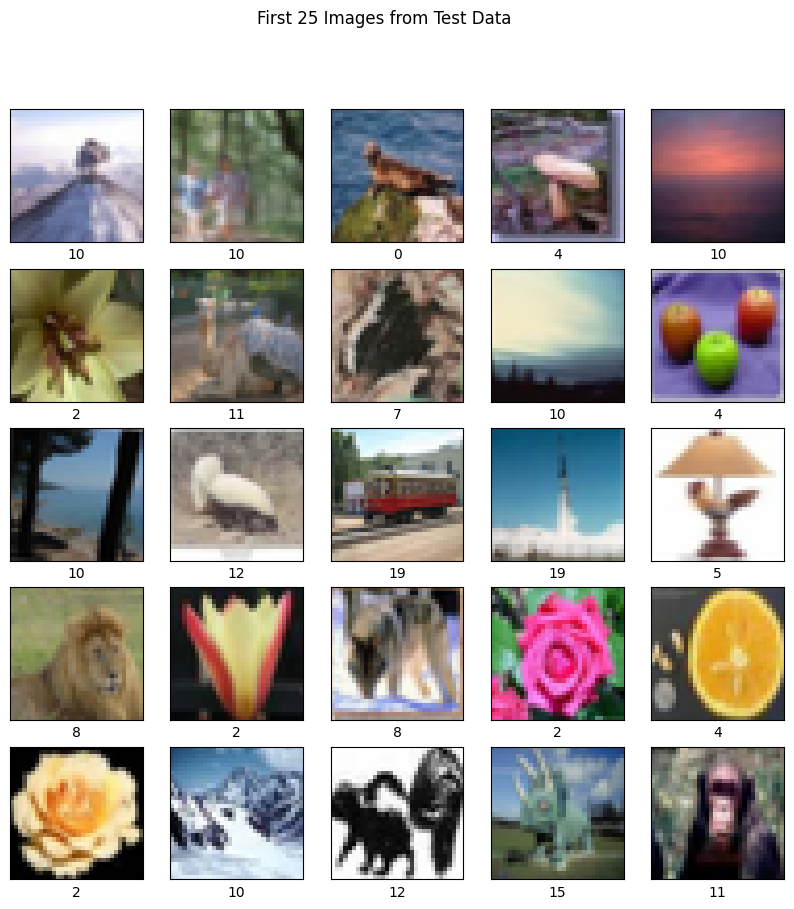

In [7]:
plot_images(x_test,y_test, "First 25 Images from Test Data")


4. Normalize the data

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [9]:
def vgg16_model(input_shape=(32, 32, 3), num_classes=100):
    #1
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    #2
    model.add(layers.Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    #3
    model.add(layers.Conv2D(256, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    #4
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    #Flatten
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [10]:
model = vgg16_model(input_shape=(32, 32, 3), num_classes=100)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step - accuracy: 0.0845 - loss: 3.2919 - val_accuracy: 0.1600 - val_loss: 2.6610
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 65s 36ms/step - accuracy: 0.1880 - loss: 2.5612 - val_accuracy: 0.2364 - val_loss: 2.4793
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.2879 - loss: 2.2419 - val_accuracy: 0.2648 - val_loss: 2.5696
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.3924 - loss: 1.8980 - val_accuracy: 0.3906 - val_loss: 1.9736
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.4646 - loss: 1.6512 - val_accuracy: 0.4918 - val_loss: 1.6084
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.5230 - loss: 1.4539 - val_accuracy: 0.4904 - val_loss: 1.6145
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5799 - loss: 1.2897 - val_accuracy: 0.5156 - val_loss: 1.5722
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.6198 - loss: 1.1576 - 

In [1]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

NameError: name 'model' is not defined

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

313/313 [==============================] - 60s 7ms/step - loss: 1.5216 - accuracy: 0.5635


[1.5216360092163086, 0.5634999871253967]